# **Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# **Data Loading**

In [3]:
data = pd.read_csv('sneakers_streetwear_sales_data.csv')
data_original = data.copy()

In [4]:
data_original.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


In [5]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            353 non-null    object 
 1   Product Name    353 non-null    object 
 2   Product Type    353 non-null    object 
 3   Brand           353 non-null    object 
 4   Gender          353 non-null    object 
 5   Category        353 non-null    object 
 6   Country         353 non-null    object 
 7   Quantity        353 non-null    int64  
 8   Unit Price ($)  353 non-null    float64
 9   Amount ($)      353 non-null    float64
 10  Payment Mode    353 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.5+ KB


In [6]:
data_original.isnull().sum()

Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64

In [7]:
data_original.describe()

,Quantity,Unit Price ($),Amount ($)
count,353.000000,353.000000,353.000000
mean,3.107649,174.607054,547.034193
std,1.408083,71.625710,343.084461
min,1.000000,50.100000,50.100000
25%,2.000000,113.750000,268.780000
50%,3.000000,175.510000,494.400000
75%,4.000000,235.500000,783.930000
max,5.000000,299.730000,1496.500000


In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [9]:
data.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            353 non-null    datetime64[ns]
 1   Product Name    353 non-null    object        
 2   Product Type    353 non-null    object        
 3   Brand           353 non-null    object        
 4   Gender          353 non-null    object        
 5   Category        353 non-null    object        
 6   Country         353 non-null    object        
 7   Quantity        353 non-null    int64         
 8   Unit Price ($)  353 non-null    float64       
 9   Amount ($)      353 non-null    float64       
 10  Payment Mode    353 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 30.5+ KB


# **EDA**

## **1. Unique Value Counts**

### **1. Unique Values Per Columns**

In [11]:
unique_values = {col : data[col].nunique() for col in data.columns}
unique_df = pd.DataFrame(unique_values.items(), columns=['Column', 'Unique Values'])
print(unique_df)

            Column  Unique Values
0             Date            191
1     Product Name             10
2     Product Type              5
3            Brand              7
4           Gender              3
5         Category              4
6          Country              7
7         Quantity              5
8   Unit Price ($)            352
9       Amount ($)            353
10    Payment Mode              4


### **2. Value Counts For Categorical Columns**

In [12]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} value counts:\n", data[col].value_counts())



Product Name value counts:
 Product Name
Off-White Hoodie              48
Yeezy Boost 350               42
Nike Tech Fleece              41
Puma Joggers                  41
Nike Dunk Low                 33
Jordan 1 High                 33
Supreme Hoodie                32
New Era Cap                   29
Adidas Ultraboost             28
Fear of God Essentials Tee    26
Name: count, dtype: int64

Product Type value counts:
 Product Type
Sneakers    136
Hoodie      121
Joggers      41
Cap          29
T-shirt      26
Name: count, dtype: int64

Brand value counts:
 Brand
Nike          107
Adidas         70
Off-White      48
Puma           41
Supreme        32
New Era        29
Essentials     26
Name: count, dtype: int64

Gender value counts:
 Gender
Women     133
Men       128
Unisex     92
Name: count, dtype: int64

Category value counts:
 Category
Casual             99
Streetwear         92
Limited Edition    85
Sportswear         77
Name: count, dtype: int64

Country value counts:
 Coun

## **2. Revenue Analysis**

### **1. Most Revenue Collected By Brands, Products And Category**

In [13]:
# brands
top_brands = data.groupby('Brand')['Amount ($)'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    top_brands,
    x='Brand',
    y='Amount ($)',
    title='Top Selling Brands by Total Sales Amount',
    labels={'Brand': 'Brand', 'Amount ($)': 'Total Sales Amount ($)'},
    color='Amount ($)',
    color_continuous_scale=px.colors.sequential.Viridis,
    template='plotly_dark'
)
fig.show()

# Products
top_products = data.groupby('Product Type')['Amount ($)'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    top_products,
    x='Product Type',
    y='Amount ($)',
    title='Top Selling Products by Total Sales Amount',
    labels={'Product Type': 'Product', 'Amount ($)': 'Total Sales Amount ($)'},
    color='Amount ($)',
    color_continuous_scale=px.colors.sequential.Viridis,
    template='plotly_dark'
)
fig.show()

# Category
revenue_by_category = data.groupby('Category')['Amount ($)'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    revenue_by_category,
    x='Category',
    y='Amount ($)',
    title='Most Revenue collected by Category',
    labels={'Category': 'Category', 'Amount ($)': 'Total Sales Amount ($)'},
    color='Amount ($)',
    color_continuous_scale=px.colors.sequential.Viridis,
    template='plotly_dark'
)
fig.show()

**Top Selling Brands**
* Nike leads significantly in total sales, generating nearly double the revenue of the second-highest brand.

* Adidas follows as the second-highest selling brand.

* Essentials ranks lowest in total brand sales despite having a wide product line.

**Top Selling Products**
* Sneakers are the most sold product by revenue, surpassing hoodies.

* Joggers, caps, and T-shirts contribute far less, indicating customer preference for footwear and outerwear.

**Revenue by Category**
* Casual and Streetwear categories dominate, with nearly equal and highest total sales.

* Limited Edition items also perform well, but not as strongly as core categories.

* Sportswear has the lowest revenue among the four, possibly due to niche appeal or lower unit prices.

### **2. Most Revenue Collected By Countries**

In [14]:
# Country
revenue_by_country = data.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    revenue_by_country,
    x='Country',
    y='Amount ($)',
    title='Most Revenue collected by Country',
    labels={'Country': 'Country', 'Amount ($)': 'Total Sales Amount ($)'},
    color='Amount ($)',
    color_continuous_scale=px.colors.sequential.Viridis,
    template='plotly_dark'
)
fig.show()

Japan and key Western countries dominate revenue contribution, which could guide regional marketing and inventory strategies. There may be opportunities for growth in India and Australia with targeted campaigns.

### **3. Revnenue Collected By Gender Category**

In [28]:
revenue_by_gender = data.groupby('Gender')['Amount ($)'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    revenue_by_gender,
    x='Gender',
    y='Amount ($)',
    title='Most Revenue collected by Gender',
    labels={'Gender': 'Gender', 'Amount ($)': 'Total Sales Amount ($)'},
    color='Amount ($)',
    color_continuous_scale=px.colors.sequential.Viridis,
    template='plotly_dark'
)
fig.show()

Higher amount of revenue is collected from Women's Wears then the Men's wear

## **3. Countries Analysis**

In [15]:
def plot_country_sales_insights(data, country_name):

    country_df = data[data['Country'] == country_name]

    if country_df.empty:
        print(f"No data available for {country_name}")
        return

    def plot_bar(df_grouped, x_col, y_col, title):
        fig = px.bar(
            df_grouped,
            x=x_col,
            y=y_col,
            title=title,
            labels={x_col: x_col, y_col: 'Total Quantity Sold'},
            color=y_col,
            color_continuous_scale=px.colors.sequential.Viridis,
            template='plotly_dark'
        )
        fig.show()

    # Product Name
    product_sales = country_df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).reset_index()
    plot_bar(product_sales, 'Product Name', 'Quantity', f'Top Selling Products in {country_name} by Quantity Sold')

    # Product Type
    type_sales = country_df.groupby('Product Type')['Quantity'].sum().sort_values(ascending=False).reset_index()
    plot_bar(type_sales, 'Product Type', 'Quantity', f'Top Selling Product Types in {country_name} by Quantity Sold')

    # Brand
    brand_sales = country_df.groupby('Brand')['Quantity'].sum().sort_values(ascending=False).reset_index()
    plot_bar(brand_sales, 'Brand', 'Quantity', f'Top Selling Brands in {country_name} by Quantity Sold')

    # Category
    category_sales = country_df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).reset_index()
    plot_bar(category_sales, 'Category', 'Quantity', f'Top Selling Categories in {country_name} by Quantity Sold')

    # Payment Method
    payment_mode = country_df.groupby('Payment Mode').size().reset_index(name='Transaction Count')
    payment_mode = payment_mode.sort_values(by='Transaction Count', ascending=False)
    plot_bar(payment_mode, 'Payment Mode', 'Transaction Count', f'Top Payment Modes in {country_name} by Transaction Count')



In [16]:
plot_country_sales_insights(data, "India")

## **4. Payment Method Analysis**

### **1. Most Used Payment mode**

In [17]:
payment_mode_counts = data['Payment Mode'].value_counts().reset_index()
payment_mode_counts.columns = ['Payment Mode', 'count']

fig = px.pie(
    payment_mode_counts,
    names='Payment Mode',
    values='count',
    title='Most Used Payment Mode',
    labels={'index': 'Payment Mode', 'Payment Mode': 'Count'},
    color='Payment Mode',
    template='plotly_dark'
)

fig.show()

Despite the rise of digital payments, Cash on Delivery remains dominant, indicating customer preference for post-purchase payment security. Card and Wallet payments are tied in popularity, while UPI adoption is promising but may benefit from additional incentives or education to boost usage.

## **5. Quantity & Price Analysis**

In [18]:
# Quantity Distribution
brand_sales = data.groupby('Brand', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

fig = px.bar(
    brand_sales,
    x='Brand',
    y='Quantity',
    title='Total Quantity Sold by Brand',
    color='Quantity',
    color_continuous_scale='Viridis',
    template='plotly_dark'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Unit Price Distribution
unit_price_distribution = data.groupby('Brand')['Unit Price ($)'].mean().reset_index()

fig = px.box(
    data,
    x='Brand',
    y='Unit Price ($)',
    title='Unit Price Distribution By Brand',
    labels={'Brand': 'Brand', 'Unit Price ($)': 'Average Unit Price ($)'},
    template='plotly_dark',
    points='all'
)
fig.show()

**Nike Leads by a Large Margin**

* Nike sold the highest quantity by far, indicating strong customer preference, high brand loyalty, or wider product availability.

* This could also reflect aggressive marketing strategies or competitive pricing.

**Adidas Performs Well, But Not Close to Nike**

* Adidas stands in second place, but there's a noticeable gap between its quantity sold and Nike’s.

* Suggests Adidas has a solid market presence but still lags behind Nike in terms of volume.

**Mid-Tier Brands Show Moderate Demand**

* Off-White and Puma represent mid-level brand performance.

* These brands may be popular in niche markets or for specific product categories.

**Low-Tier Brands Have Limited Sales**

* Supreme, New Era, and Essentials have the lowest sales quantities.

* This could be due to limited product range, niche appeal, higher pricing, or lower brand visibility.

## **6. Time Series Trends**

### **1. Monthly Revenue by Amount**

#### **1. Monthly Revenue Trend**

In [19]:
monthly_revenue = data.set_index('Date').resample('M')['Amount ($)'].sum().reset_index()

fig = px.line(
    monthly_revenue,
    x='Date',
    y='Amount ($)',
    title='Monthly Revenue Trend',
    markers=True,
    template='plotly_dark',
    labels={'Amount ($)': 'Revenue ($)'}
)

fig.update_traces(line=dict(color='blue'))
fig.show()

**Monthly Revenue Trend Analysis**
**1. Revenue Peaks in August 2022**

* August marks the highest revenue point (over $32,000).

**Possible reasons could include:**

* Seasonal promotions

* Holiday or festival-related spikes

* New product launches

* Clearance sales

**Strong Revenue in April 2022**

* The second-highest revenue occurred in April (close to $29,000).

* Indicates another period of strong demand or successful campaigns.

**May 2022 Shows the Lowest Revenue**

* Revenue dropped significantly in May (around $17,000), the lowest in the trend.

* Could indicate supply chain issues, low customer activity, or lack of promotions.

**Fluctuating Performance**

* Overall, the revenue trend shows high volatility month to month.

* Suggests that sales may be driven by external events or inconsistent marketing.

**Recovery After Dips**

* After the dip in May, revenue steadily increases until it peaks in August.

* Shows resilience and effective recovery strategies, possibly improved customer engagement or restocked inventory.

**Recent Decline in September**

* Revenue decreased again in September (approx. $25,000).

* Monitoring upcoming months is important to see if this is a seasonal drop or the start of a downward trend.

#### **2. Monthly Revenue Trend By Country**

In [20]:
monthly_country_revenue = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Country'])['Amount ($)']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_country_revenue,
    x='Date',
    y='Amount ($)',
    color='Country',
    title='Monthly Revenue Trend by Country',
    markers=True,
    template='plotly_dark',
    labels={'Amount ($)': 'Revenue ($)'}
)
fig.show()


**USA and India are the top performers**—worth investigating what drove their growth (e.g., campaigns, market expansion).

**UK’s volatility suggests seasonal or external factors**—could benefit from stabilization strategies.

Australia and Japan may need targeted interventions to boost performance.

#### **3. Monthly Revenue By Category**

In [21]:
monthly_category_revenue = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Category'])['Amount ($)']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_category_revenue,
    x='Date',
    y='Amount ($)',
    color='Category',
    title='Monthly Revenue Trend by Category',
    markers=True,
    template='plotly_dark',
    labels={'Amount ($)': 'Revenue ($)'}
)
fig.show()


**Streetwear is a clear revenue leader**—worth doubling down on marketing, inventory, and regional targeting.

**Limited Edition** spikes could be optimized with better timing or bundling strategies to sustain momentum.

**Casual** and **Sportswear** offer reliable baseline revenue—ideal for loyalty programs or upselling.

#### **4. Monthly Revenue By Brands**

In [22]:
monthly_brand_revenue = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Brand'])['Amount ($)']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_brand_revenue,
    x='Date',
    y='Amount ($)',
    color='Brand',
    title='Monthly Revenue Trend by Brand',
    markers=True,
    template='plotly_dark',
    labels={'Amount ($)': 'Revenue ($)'}
)
fig.show()

Bundle Off-White with **Limited Edition** campaigns in high-performing countries (USA, India).

Use **Adidas** as a stable revenue anchor across all regions and categories.

Target **Streetwear** growth in underperforming countries like Australia and Japan.

Monitor volatility—brands like **Supreme** and **Essentials** may need repositioning or better timing.

#### **5. Monthly Revenue By Product Type**

In [23]:
monthly_Product_Type_revenue = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Product Type'])['Amount ($)']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_Product_Type_revenue,
    x='Date',
    y='Amount ($)',
    color='Product Type',
    title='Monthly Revenue Trend by Product Type',
    markers=True,
    template='plotly_dark',
    labels={'Amount ($)': 'Revenue ($)'}
)
fig.show()

We can double down on **Sneakers** and **Hoodies** in high-performing countries (USA, India).

Time product drops with category spikes—e.g., Limited Edition Hoodie in **August**.

Bundle low performers (Caps, Joggers) with high-demand items to boost average order value.

We can use *T-shirts* as a stable revenue base—ideal for promotions or entry-level offerings.

### **2. Monthly Unit Sold**

#### **1. Monthly Units Sold By Brands**

In [24]:
monthly_unit_sold_country = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Brand'])['Quantity']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_unit_sold_country,
    x='Date',
    y='Quantity',
    color='Brand',
    title='Monthly Unit Sold Trend by Brand',
    markers=True,
    template='plotly_dark',
    labels={'Quantity': 'Quantity'}
)
fig.show()

**Adidas:** Ideal for bulk campaigns, loyalty programs, and regional scaling.

**Off-White:** Focus on exclusivity, timed drops, and high-margin bundles.

**Nike & Puma:** Push mid-tier campaigns with sports/event tie-ins.

**Supreme, Essentials, New Era:** Reassess positioning or bundle with high-volume items.

#### **2. Monthly Units Sold By Category**

In [25]:
monthly_unit_sold_category = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Category'])['Quantity']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_unit_sold_category,
    x='Date',
    y='Quantity',
    color='Category',
    title='Monthly Unit Sold Trend by Category',
    markers=True,
    template='plotly_dark',
    labels={'Quantity': 'Quantity'}
)
fig.show()

**Casual:** Anchor category for volume—ideal for entry-level pricing, bundles, and COD.

**Streetwear:** Targeted campaigns in youth-heavy markets (India, USA), timed with sneaker drops.

**Sportswear:** Steady performer—great for sports events, fitness tie-ins.

**Limited Edition:** Maximize hype cycles—pair with Off-White, Hoodies, and premium payment methods (Card, UPI).

#### **3. Monthly Units Sold By Product Type**

In [26]:
monthly_unit_sold_producttype = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Product Type'])['Quantity']
    .sum()
    .reset_index()
)

fig = px.line(
    monthly_unit_sold_producttype,
    x='Date',
    y='Quantity',
    color='Product Type',
    title='Monthly Unit Sold Trend by Product Type',
    markers=True,
    template='plotly_dark',
    labels={'Quantity': 'Quantity'}
)
fig.show()

**T-shirts + Joggers:** Bundle for Casual category promotions—great for COD and loyalty programs.

**Sneakers + Hoodie:** Target Limited Edition and Streetwear drops—ideal for UPI/Card payments and influencer tie-ins.

**Cap:** Use as a freebie or upsell item in Streetwear campaigns to boost perceived value.

### **3. Monthly Transaction Count By Payment Method**

In [27]:
monthly_payment_count = (
    data.groupby([pd.Grouper(key='Date', freq='M'), 'Payment Mode']).size().reset_index(name='Transaction Count')
)

fig = px.bar(
    monthly_payment_count,
    x='Date',
    y='Transaction Count',
    color='Payment Mode',
    title='Monthly Transaction Count by Payment Method',
    barmode='group',
    template='plotly_dark'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Optimize checkout flows for ***Card*** and ***UPI***, especially during peak months (April, August).

Bundle ***COD*** with low-risk items and offer easy returns to build trust.

Promote ***Wallet*** usage with targeted discounts on low-performing products (Caps, Joggers).

Segment campaigns by payment preference—e.g., UPI-first flash sales in India, Card-based bundles in USA.

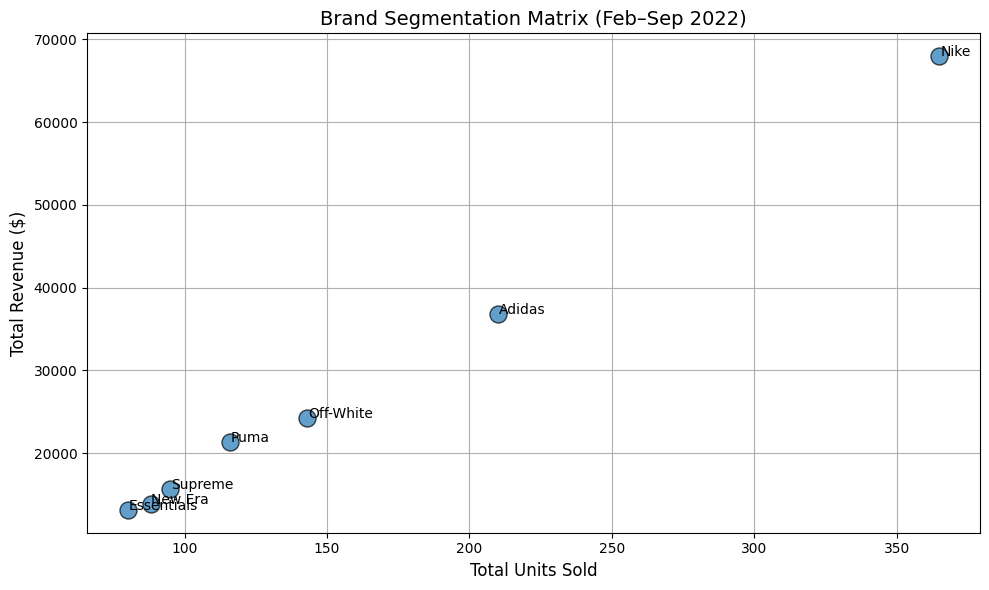

In [30]:
brand_summary = data.groupby("Brand").agg({
    "Quantity": "sum",
    "Amount ($)": "sum"
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(brand_summary["Quantity"], brand_summary["Amount ($)"], s=150, alpha=0.7, edgecolors='black')

# Annotate each brand
for i, row in brand_summary.iterrows():
    plt.text(row["Quantity"] + 0.3, row["Amount ($)"], row["Brand"], fontsize=10)

# Axis labels and title
plt.xlabel("Total Units Sold", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Brand Segmentation Matrix (Feb–Sep 2022)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()